In [16]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [17]:
dataset=pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [18]:
#Check how many missing values each column has
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [19]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [20]:
dataset.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [21]:
def quanQual(dataset):
    quantitative=[]
    qualitative=[]
    for columnName in dataset.columns:
        if(dataset[columnName].dtype == 'O'):
        # print("qualitative")
           qualitative.append(columnName)
        else:
            # print("quantitative")
            quantitative.append(columnName)
    return quantitative, qualitative   
        

In [22]:
quantitative, qualitative = quanQual(dataset)

In [23]:
quantitative

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [24]:
qualitative

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [25]:
print(dataset.describe())

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


##### 1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [29]:
# If not placed, salary should be 0
dataset.loc[dataset["status"] == "Not Placed", "salary"] = 0

# If placed and salary is missing, use median salary
median_salary = dataset[dataset["status"] == "Placed"]["salary"].median()
dataset["salary"].fillna(median_salary, inplace=True)

In [27]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
# The Salary column had 67 missing values.
# For students with "Not Placed" status, I set the salary to 0 (since they weren’t hired).
# For students who were placed, I filled missing salaries with the median salary of all placed students.

##### 2)How many of them are not placed?

In [40]:
not_placed_status=dataset[dataset["status"]=="Not Placed"].shape[0]
print("Number of students not placed::", not_placed_status)

Number of students not placed:: 67


In [41]:
# I filtered the dataset for rows where the status is "Not Placed" and counted them.

##### 3)Find the reason for non placement from the dataset?

In [45]:
placed = dataset[dataset['status'] == 'Placed']
not_placed = dataset[dataset['status'] == 'Not Placed']

In [44]:
print("Average scores of Placed candidates:")
print(placed[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean())

print("\nAverage scores of Not Placed candidates:")
print(not_placed[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean())

Average scores of Placed candidates:
ssc_p       71.721486
hsc_p       69.926554
degree_p    68.740541
etest_p     73.238041
mba_p       62.579392
dtype: float64

Average scores of Not Placed candidates:
ssc_p       57.544030
hsc_p       58.395522
degree_p    61.134179
etest_p     69.587910
mba_p       61.612836
dtype: float64


In [46]:
print(not_placed["workex"].value_counts())
print(not_placed["specialisation"].value_counts())

workex
No     57
Yes    10
Name: count, dtype: int64
specialisation
Mkt&HR     42
Mkt&Fin    25
Name: count, dtype: int64


In [47]:
# Students with lower SSC and HSC scores, no work experience, and Marketing & HR specialization were less likely to get placed.
# Those with higher marks and work experience had better placement chances.
# This shows that good academics and experience can improve placement outcomes.

##### 4)What kind of relation between salary and mba_p

In [48]:
correlation = dataset[['mba_p','salary']].corr()
correlation

,mba_p,salary
mba_p,1.000000,0.139823
salary,0.139823,1.000000


In [ ]:
# I found the correlation between MBA percentage and salary to be about 0.14, showing a very weak positive relationship.
# This means students with higher MBA scores may earn slightly more, but the link is not strong — other factors likely affect salary more.

##### 5)Which specialization is getting minimum salary?

In [49]:
specialisation_salary = dataset.groupby("specialisation")["salary"].mean()
print(specialisation_salary)

specialisation
Mkt&Fin    236591.666667
Mkt&HR     150842.105263
Name: salary, dtype: float64


In [50]:
# idxmin() gives the label (not the value) of the smallest number in a Series
min_specialisation = specialisation_salary.idxmin()
min_salary = specialisation_salary.min()
print(f"Specialisation with the lowest average salary is: {min_specialisation} with {min_salary}")


Specialisation with the lowest average salary is: Mkt&HR with 150842.1052631579


In [ ]:
# I grouped the data by specialization and calculated the average salary for each.
# Then, I used idxmin() to find the specialization with the lowest average salary.
# This shows which specialization earns the least on average.

 ##### 6)How many of them getting above 500000 salary?

In [53]:
highest_salary = dataset[dataset['salary']>500000]
count=highest_salary.shape[0]

In [55]:
print(f"Number of candidates with salary above Rs.500000: {count}")

Number of candidates with salary above Rs.500000: 3


In [56]:
# I filtered the data to find students with a salary above ₹500,000.
# There are 3 such students, showing how many got high-paying jobs.

##### 7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [57]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'], dataset['mba_p'])

F_onewayResult(statistic=np.float64(98.64487057324709), pvalue=np.float64(4.672547689133573e-21))

In [58]:
# The p-value (4.67e-21) is much smaller than 0.05, so we reject the null hypothesis.
# This means there is a significant difference between etest_p and mba_p scores.

##### 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [59]:
from scipy.stats import ttest_ind
# Filter 1: salaries of those with degree in Sci&Tech
sci_tech_salary = dataset[dataset['degree_t'] == 'Sci&Tech']['salary']
# Filter 2: salaries of those with specialisation in Mkt&HR
mkt_hr_salary = dataset[dataset['specialisation'] == 'Mkt&HR']['salary']
# Drop missing values if any
sci_tech_salary = sci_tech_salary.dropna()
mkt_hr_salary = mkt_hr_salary.dropna()
result = ttest_ind(sci_tech_salary, mkt_hr_salary)
print(result)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))


In [ ]:
# The p-value (0.0078) is less than 0.05, so we reject the null hypothesis.
# This means there is a significant difference in salary between students with Sci&Tech and Mkt&HR degrees.

##### 9)Convert the normal distribution to standard normal distribution for salary column

<Axes: xlabel='salary', ylabel='Density'>

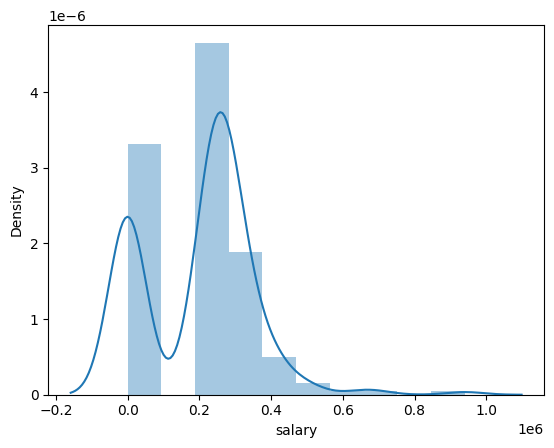

In [60]:
import seaborn as sns
sns.distplot(dataset["salary"])

In [61]:
def stdNBgraph(dataset):
    #convert to standard normal distribution
    import seaborn as sns
    mean = dataset.mean()
    std = dataset.std()

    values = [i for i in dataset]
    z_score = [((j-mean)/std) for j in values]

    sns.distplot(z_score, kde = True)

    sum(z_score)/len(z_score)

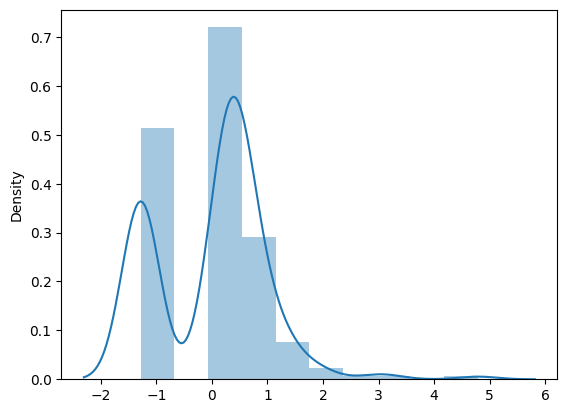

In [62]:
stdNBgraph(dataset["salary"])

In [ ]:
# I made a function to standardize numeric columns using the Z-score formula.
# After plotting with seaborn, the mean was about 0, confirming the transformation worked correctly.

#####  10)What is the probability Density Function of the salary range from 700000 to 900000?

In [63]:
def get_pdf_probability(dataset, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset, kde = True, kde_kws = {'color': 'blue'}, color = 'Green')
    pyplot.axvline(startrange, color = 'Red')
    pyplot.axvline(endrange, color = 'Red')
    #generate a sample
    sample = dataset
    #caluclate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean = %.3f, Standard Deviation = %.3f' % (sample_mean, sample_std))
    dist = norm(sample_mean, sample_std)

    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    probs = sum(probabilities)
    print("The area between range({}, {}): {}".format(startrange,endrange,sum(probabilities)))
    return probs

Mean = 198702.326, Standard Deviation = 154780.927
The area between range(700000, 900000): 0.0005973310593974868


np.float64(0.0005973310593974868)

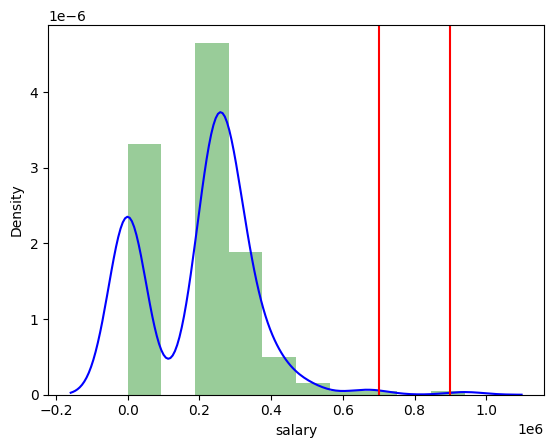

In [64]:
get_pdf_probability(dataset["salary"], 700000, 900000)

In [ ]:
# I used the normal distribution to find the chance of earning between ₹700,000 and ₹900,000.
# With a mean salary of ₹198,702.33 and standard deviation of ₹154,780.93, the probability was 0.000597 — very small.
# This means high salaries are rare, and most people earn much less, near the average.

##### 11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [65]:
from scipy.stats import ttest_rel
a = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
b = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_ind(a, b)

TtestResult(statistic=np.float64(4.532000225151251), pvalue=np.float64(1.4289217003775636e-05), df=np.float64(116.0))

In [ ]:
# The p-value is below 0.05, so we reject the null hypothesis.
# This means there is a significant difference between etest_p and mba_p scores for Sci&Tech students.

##### 12)Which parameter is highly correlated with salary?

In [67]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64'])
correlations = numeric_cols.corr()
salary_correlations = correlations['salary'].sort_values(ascending=False)
print(salary_correlations)

salary      1.000000
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
sl_no       0.002543
Name: salary, dtype: float64


In [68]:
# The ssc_p (10th grade percentage) shows the strongest positive correlation with salary (r = 0.538).
# This means students with higher 10th grade scores tend to get better salaries after placement.

##### 13) plot any useful graph and explain it.

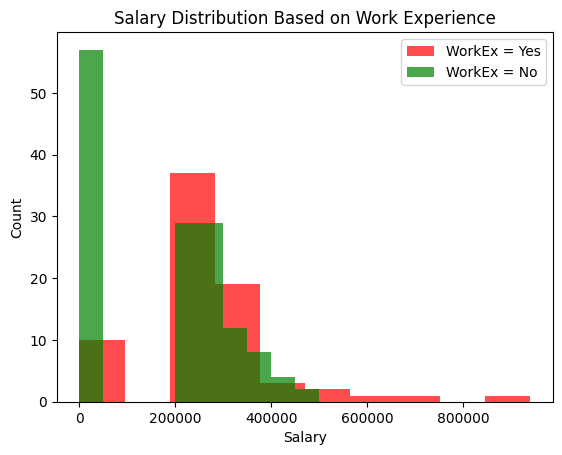

In [69]:
import matplotlib.pyplot as plt
salary_yes = dataset[dataset['workex'] == 'Yes']['salary']
salary_no = dataset[dataset['workex'] == 'No']['salary']

plt.hist(salary_yes, bins=10, alpha=0.7, label='WorkEx = Yes', color='red')
plt.hist(salary_no, bins=10, alpha=0.7, label='WorkEx = No', color='green')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary Distribution Based on Work Experience')
plt.legend()
plt.show()

In [ ]:
# I made a histogram to compare salary distributions for students with and without work experience.
# It shows that students without experience mostly earn less or aren’t placed,
# while those with experience tend to earn higher salaries — suggesting work experience helps in placements.